## Salary Predication on Countries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:

df=df[['Employment','EdLevel','YearsCodePro','Country','ConvertedCompYearly']]

df=df.rename({'ConvertedCompYearly':'Salary'},axis=1)
df.head()

,Employment,EdLevel,YearsCodePro,Country,Salary
0,"Employed, full-time",Primary/elementary school,NaN,United States of America,NaN
1,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,United Kingdom of Great Britain and Northern I...,NaN
2,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,United Kingdom of Great Britain and Northern I...,NaN
3,"Student, full-time",Some college/university study without earning ...,NaN,Canada,NaN
4,"Student, full-time","Secondary school (e.g. American high school, G...",NaN,Norway,NaN


In [4]:
df.shape

(65437, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Employment    65437 non-null  object 
 1   EdLevel       60784 non-null  object 
 2   YearsCodePro  51610 non-null  object 
 3   Country       58930 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [6]:

df=df.dropna()
df.isnull().sum()
df.shape


(23345, 5)

In [7]:

df=df[df['Employment']=='Employed, full-time']
df=df.rename({'YearsCodePro':'Experience'},axis=1)
df.head()


,Employment,EdLevel,Experience,Country,Salary
374,"Employed, full-time","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,Austria,30074.0
379,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Turkey,91295.0
392,"Employed, full-time","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,United Kingdom of Great Britain and Northern I...,161044.0
395,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,United Kingdom of Great Britain and Northern I...,121018.0
398,"Employed, full-time",Some college/university study without earning ...,30,United States of America,195000.0


In [8]:
df=df.drop(['Employment'],axis=1)



In [9]:
def experience_encoder(age):
    if age == 'Less than 1 year':
        return 0.5
    if age == 'More than 50 years':
        return 50
    return float(age)



def shorten_categories(categories,cutoff):
    cat_map={}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            cat_map[categories.index[i]]=categories.index[i]
        else:
             cat_map[categories.index[i]]='Others'
    return cat_map

def edu_encoder(x):
    if 'Bachelor’s degree' in x:
        return "Bachelor’s degree"
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Professional degree'
    return "Less than a Bachelor"
    
  
    


In [10]:
df['Experience']=df['Experience'].apply(experience_encoder)

Country_map=shorten_categories(df.Country.value_counts(),400)
df['Country']=df['Country'].map(Country_map)
df['EdLevel']=df['EdLevel'].apply(edu_encoder)



In [11]:
df.Country.unique()

array(['Others', 'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'France', 'Germany', 'Canada',
       'Brazil', 'Ukraine', 'Italy', 'India', 'Spain', 'Netherlands',
       'Australia'], dtype=object)

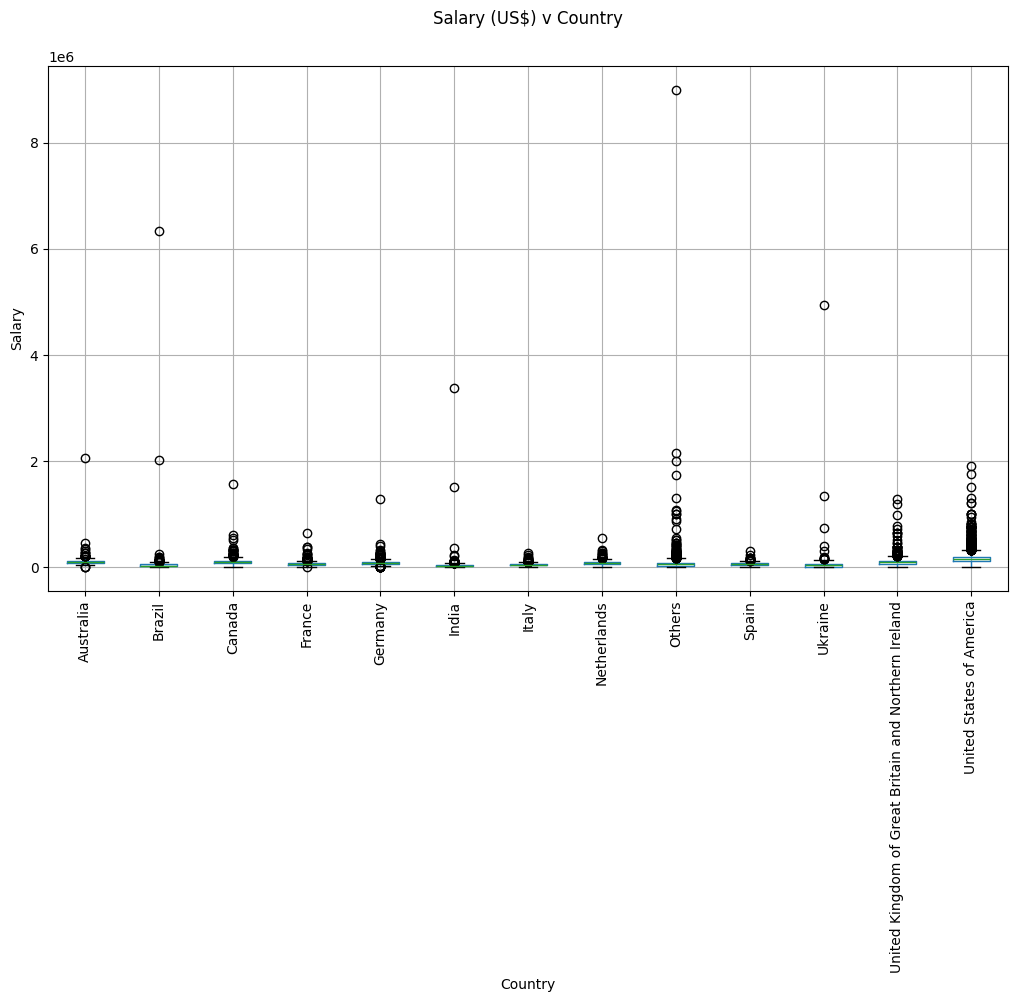

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()
df=df[df['Salary']<=2000000]

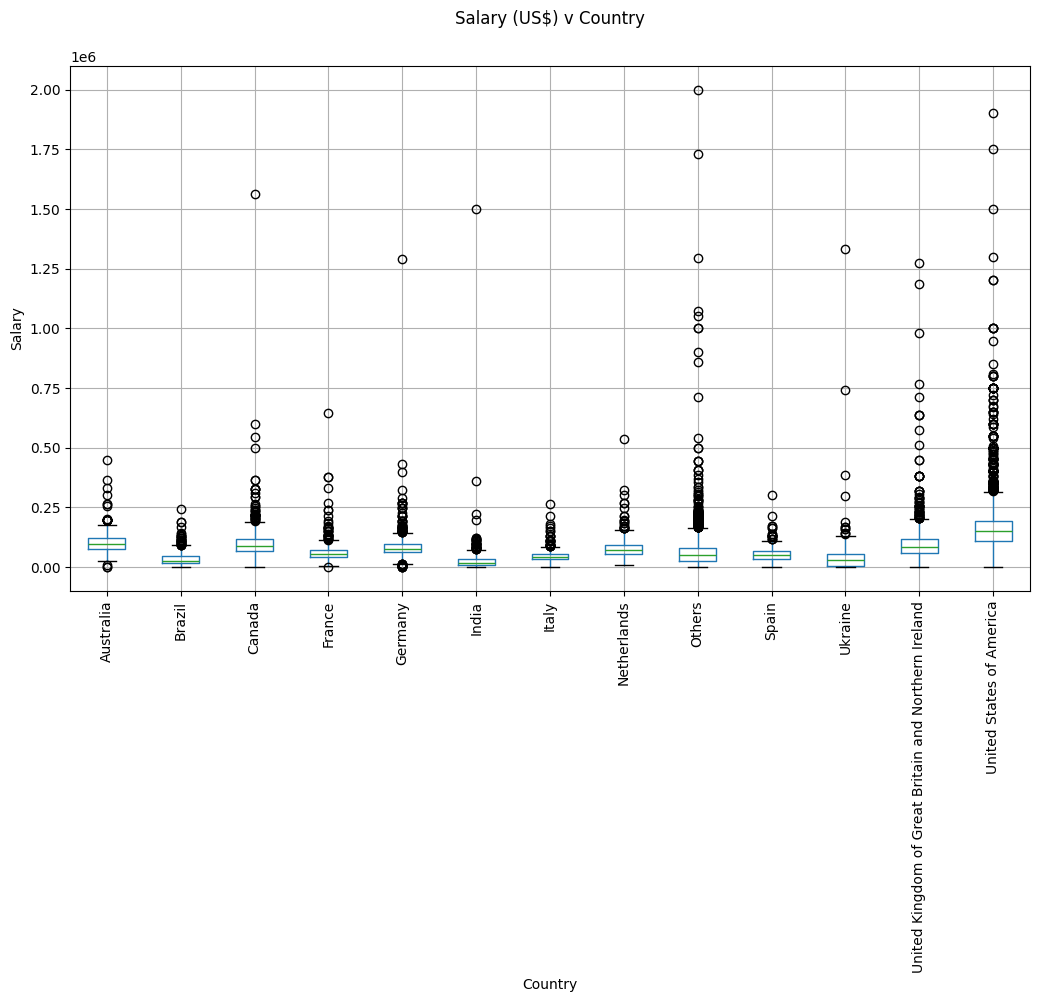

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()
df=df[df['Salary']<=250000]
df=df[df['Salary']>=10000]
df=df[df['Country']!='Others']


In [14]:
df.EdLevel.unique()


array(['Professional degree', 'Master’s degree', 'Less than a Bachelor',
       'Bachelor’s degree'], dtype=object)

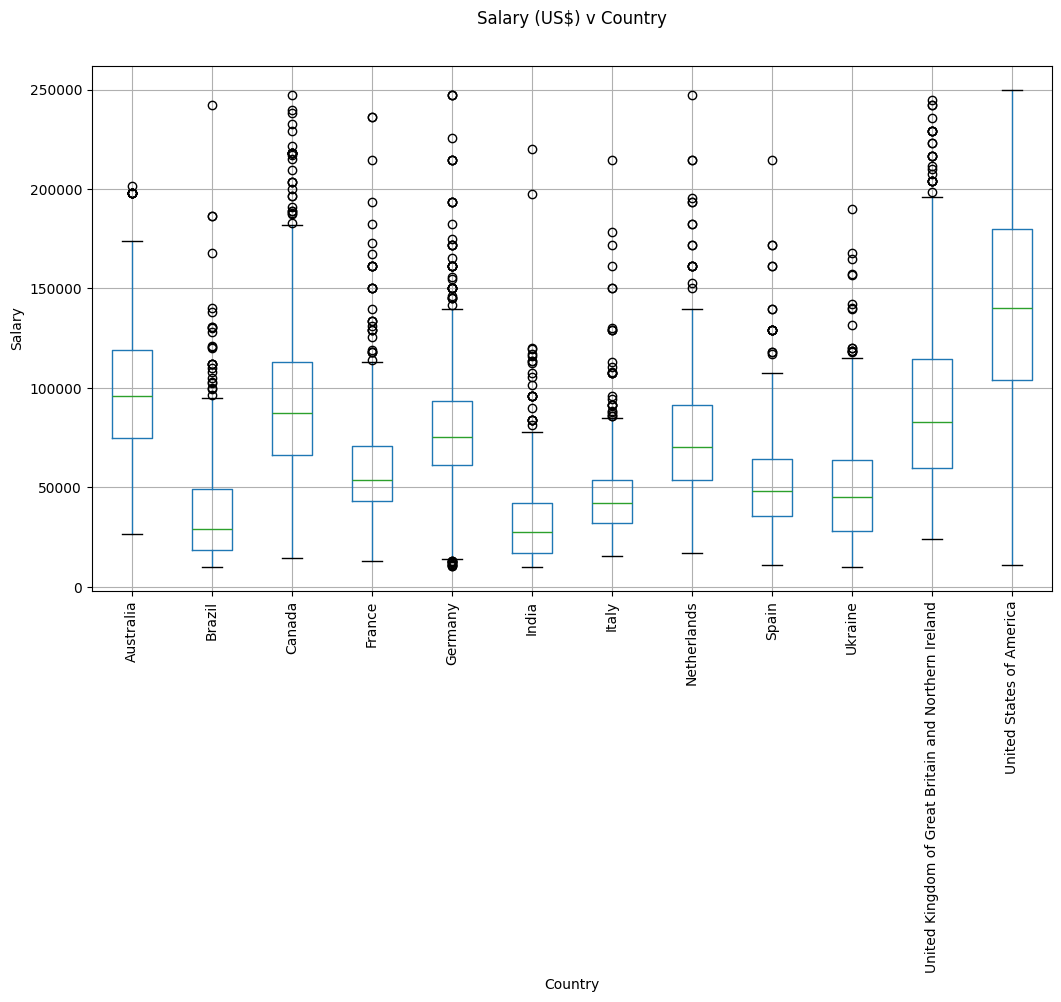

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [16]:
df.head()
df.Country.value_counts()


Country
United States of America                                3528
Germany                                                 1469
United Kingdom of Great Britain and Northern Ireland    1101
France                                                   711
Ukraine                                                  668
Canada                                                   664
India                                                    563
Spain                                                    422
Italy                                                    409
Netherlands                                              399
Brazil                                                   389
Australia                                                389
Name: count, dtype: int64

In [17]:
df.EdLevel.unique()


array(['Professional degree', 'Master’s degree', 'Less than a Bachelor',
       'Bachelor’s degree'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
le_country=LabelEncoder()
df['Country']=le_country.fit_transform(df['Country'])
le_education=LabelEncoder()
df['EdLevel']=le_education.fit_transform(df['EdLevel'])
df


,EdLevel,Experience,Country,Salary
392,3,18.0,10,161044.0
395,2,25.0,10,121018.0
398,1,30.0,11,195000.0
409,3,50.0,3,57999.0
414,0,27.0,10,184712.0
...,...,...,...,...
41163,0,2.0,11,124000.0
41164,0,13.0,11,94000.0
41167,1,25.0,11,100000.0
41184,2,30.0,11,170000.0


In [19]:
df.Experience.unique()

array([18. , 25. , 30. , 50. , 27. ,  1. , 15. , 11. , 23. , 17. , 10. ,
        8. , 12. , 26. , 40. ,  4. ,  9. , 22. , 28. , 20. , 16. , 13. ,
        3. , 35. ,  5. , 31. , 41. , 36. ,  6. , 14. ,  7. ,  0.5, 24. ,
        2. , 38. , 32. , 21. , 19. , 34. , 29. , 43. , 33. , 45. , 37. ,
       44. , 42. , 39. , 46. , 49. , 48. , 47. ])

In [20]:
X=df.drop('Salary',axis=1)
y=df['Salary']

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regressor (Random Forest is a good default)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
#1325840629.79

Mean Squared Error: 1325840629.79


In [22]:
import numpy as np
x=np.array([['Professional degree',47.0,'France']])
x_df = pd.DataFrame(x, columns=["EdLevel", "Experience", "Country"])
x_df["EdLevel"]=le_education.transform(x_df["EdLevel"])
x_df["Country"]=le_country.transform(x_df["Country"])
x_df=x_df.astype(float)
pred=regressor.predict(x_df)
pred=pred.astype(float)
print(pred)


[139352.51285714]


In [23]:
import pickle
data={"model":regressor,"le_country":le_country,"le_education":le_education}
with open ("mod.pkl",'wb') as file:
    pickle.dump(data,file)

In [24]:
with open ('mod.pkl','rb') as file:
     data= pickle.load(file)
reg_loaded=data['model']
le_country=data['le_country']
le_education=data['le_education']
dt=reg_loaded.predict(x_df)
print(dt)

[139352.51285714]
